![alt text](https://theme.zdassets.com/theme_assets/7902/7a63b03d352488898e3a870d14a103ddffe4b5fe.png)

# **Kickstarter Business Analysis** 
# *What makes a crowdfunding project successful?*

#### Group 2
#### Lorenz Werdich, Pierfrancesco Gigli, Raquel Oliveira, Tomasz Lepka

## A. Business Case

Kickstarter is one of the leading platforms that helps artists, musicians, filmmakers, designers, and other creators find the resources and support they need to make their ideas a reality. Over 10 million people, from every continent on earth, have backed a Kickstarter project.
Backers can fund a project if they support the idea and would like to see it succeed. However, a significant number of project projects still fail. This project tries to dive into attributes related to each project and to reveal patterns and other insights that might help us find the answer to what makes a crowdfunding project successfull. These insights should be used by Kickstarter to improve its business model and product offering. (Kickstarter, 2019)

## B. Data Curation

In [1]:
#!pip install squarify
#!pip install pycountry
#!pip install plotly
import rise
import seaborn as sns
import pandas as pd
import os
import json
import squarify 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
import math
from plotnine import *
import pycountry
import plotly.offline as py
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

1.   Concatanate all the csv files into one data frame assuming that they are under the relative folder named 'Kickstarter_Dataset'
2.   Drop duplicates assuming that a project can be uniquely identified by its ID and creation timestamp.




In [3]:
li = []

for filename in os.listdir('Kickstarter_Dataset'):
    df = pd.read_csv(f'Kickstarter_Dataset/{filename}', index_col=None, header=0)
    li.append(df)

kickstarter = pd.concat(li, axis=0, ignore_index=True, sort=False)
kickstarter.drop(['Unnamed: 0'], axis=1, inplace=True)
kickstarter.drop_duplicates(subset=['id','created_at'],inplace=True)
kickstarter.head()

backers_count                                              blurb  \
0              1  Jozii is the premier service for full-time uni...   
1             63  Dropsy is an adventure game with a focus on ex...   
2            113  We've bought a press and already found a studi...   
3              1  Premium, fashion sneaker brand intertwining hi...   
4             99  Made in Europe from the finest quality leather...   

                                            category  \
0  {"id":342,"name":"Web","slug":"technology/web"...   
1  {"id":35,"name":"Video Games","slug":"games/vi...   
2  {"id":349,"name":"Letterpress","slug":"publish...   
3  {"id":266,"name":"Footwear","slug":"fashion/fo...   
4  {"id":266,"name":"Footwear","slug":"fashion/fo...   

   converted_pledged_amount country  created_at  \
0                        50      US  1413476386   
1                      1613      US  1317217452   
2                      6633      US  1403324529   
3                         1      GB  1457103832   
4                     20654      CA  1423776567   

                                             creator currency currency_symbol  \
0  {"id":69089661,"name":"AJ Smith and Brandon Ma...      USD               $   
1  {"id":918042514,"name":"Jay Tholen","slug":"ja...      USD               $   
2  {"id":1551377593,"name":"Camila and Daniela","...      USD               $   
3  {"id":1361409471,"name":"Ross Buckley","is_reg...      GBP               £   
4  {"id":456810610,"name":"Luigi Sardo","slug":"l...      CAD               $   

   currency_trailing_code  ...  \
0                    True  ...   
1                    True  ...   
2                    True  ...   
3                   False  ...   
4                    True  ...   

                                                slug  \
0                       jozii-college-jobs-made-easy   
1  dropsy-a-different-take-on-the-old-school-adve...   
2  letra-chueca-crooked-letter-a-printshop-and-bi...   
3                 high-end-premium-handmade-sneakers   
4            the-domenico-sneakerboot-by-luigi-sardo   

                                          source_url  spotlight staff_pick  \
0  https://www.kickstarter.com/discover/categorie...      False      False   
1  https://www.kickstarter.com/discover/categorie...       True       True   
2  https://www.kickstarter.com/discover/categorie...       True      False   
3  https://www.kickstarter.com/discover/categorie...      False      False   
4  https://www.kickstarter.com/discover/categorie...       True      False   

        state  state_changed_at  static_usd_rate  \
0      failed        1417150742         1.000000   
1  successful        1320259153         1.000000   
2  successful        1410502338         1.000000   
3      failed        1462305856         1.407899   
4  successful        1429678899         0.782122   

                                                urls   usd_pledged  \
0  {"web":{"project":"https://www.kickstarter.com...     50.000000   
1  {"web":{"project":"https://www.kickstarter.com...   1613.470000   
2  {"web":{"project":"https://www.kickstarter.com...   6633.000000   
3  {"web":{"project":"https://www.kickstarter.com...      1.407899   
4  {"web":{"project":"https://www.kickstarter.com...  19817.405716   

        usd_type  
0  international  
1  international  
2  international  
3  international  
4  international  

[5 rows x 37 columns]

Check the datatype of all attributes to get a better understanding of the dataset.

In [4]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187074 entries, 0 to 205695
Data columns (total 37 columns):
backers_count               187074 non-null int64
blurb                       187064 non-null object
category                    187074 non-null object
converted_pledged_amount    187074 non-null int64
country                     187074 non-null object
created_at                  187074 non-null int64
creator                     187074 non-null object
currency                    187074 non-null object
currency_symbol             187074 non-null object
currency_trailing_code      187074 non-null bool
current_currency            187074 non-null object
deadline                    187074 non-null int64
disable_communication       187074 non-null bool
friends                     140 non-null object
fx_rate                     187074 non-null float64
goal                        187074 non-null float64
id                          187074 non-null int64
is_backing                  140 

So we have a mix of numerical and categorical data. Further, the variables [photo, creator, location, category, profile , urls] are in JSON format. Therefore, we need to decode the variables **relevant** to our analysis to python.

In [5]:
json_cols = ['category','location','creator', 'profile']

def safe_loads(x):
    try:
      return json.loads(x)
    except:
      return None

for column in json_cols:

    kickstarter = kickstarter.join(kickstarter[column].apply(safe_loads).apply(pd.Series),rsuffix='_'+column)

Additionaly, the variables ['state_changed_at' , 'created_at', 'launched_at'] are in UNIX time format. Therefore, we need to convert them to standard time format before we proceed.

In [7]:
# changing the UNIX time format to Timestamp

from datetime import datetime
unix_cols = ['state_changed_at' ,'created_at', 'launched_at','deadline']

for i in unix_cols:
    kickstarter[i] = kickstarter[i].apply(lambda x: datetime.fromtimestamp(x))

kickstarter.head()

backers_count                                              blurb  \
0              1  Jozii is the premier service for full-time uni...   
1             63  Dropsy is an adventure game with a focus on ex...   
2            113  We've bought a press and already found a studi...   
3              1  Premium, fashion sneaker brand intertwining hi...   
4             99  Made in Europe from the finest quality leather...   

                                            category  \
0  {"id":342,"name":"Web","slug":"technology/web"...   
1  {"id":35,"name":"Video Games","slug":"games/vi...   
2  {"id":349,"name":"Letterpress","slug":"publish...   
3  {"id":266,"name":"Footwear","slug":"fashion/fo...   
4  {"id":266,"name":"Footwear","slug":"fashion/fo...   

   converted_pledged_amount country          created_at  \
0                        50      US 2014-10-16 17:19:46   
1                      1613      US 2011-09-28 14:44:12   
2                      6633      US 2014-06-21 05:22:09   
3                         1      GB 2016-03-04 15:03:52   
4                     20654      CA 2015-02-12 21:29:27   

                                             creator currency currency_symbol  \
0  {"id":69089661,"name":"AJ Smith and Brandon Ma...      USD               $   
1  {"id":918042514,"name":"Jay Tholen","slug":"ja...      USD               $   
2  {"id":1551377593,"name":"Camila and Daniela","...      USD               $   
3  {"id":1361409471,"name":"Ross Buckley","is_reg...      GBP               £   
4  {"id":456810610,"name":"Luigi Sardo","slug":"l...      CAD               $   

   currency_trailing_code  ... text_color link_background_color  \
0                    True  ...       None                  None   
1                    True  ...       None                  None   
2                    True  ...       None                  None   
3                   False  ...       None                  None   
4                    True  ...     ffffff                         

   link_text_color link_text  \
0             None      None   
1             None      None   
2             None      None   
3             None      None   
4                    Buy Now   

                                            link_url  show_feature_image  \
0                                               None               False   
1                                               None               False   
2                                               None               False   
3                                               None               False   
4  https://www.kickstarter.com/projects/456810610...                True   

   background_image_opacity should_show_feature_image_section  \
0                       0.8                              True   
1                       0.8                              True   
2                       0.8                              True   
3                       0.8                              True   
4                       0.8                              True   

                            feature_image_attributes  \
0  {'image_urls': {'default': 'https://ksr-ugc.im...   
1  {'image_urls': {'default': 'https://ksr-ugc.im...   
2  {'image_urls': {'default': 'https://ksr-ugc.im...   
3  {'image_urls': {'default': 'https://ksr-ugc.im...   
4  {'id': 9511540, 'image_urls': {'default': 'htt...   

                         background_image_attributes  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  {'id': 11245917, 'image_urls': {'default': 'ht...  

[5 rows x 79 columns]

There are some columns that are not relevant for this business analysis, therefore to simplify the dataframe we can delete them.

In [8]:

repeated_col = ['currency_symbol', 'id_category', 'slug_location', 'name_location', 'short_name', 'localized_name', 'id_profile','parent_id']

incomplete_col = ['friends', 'permissions', 'is_root', 'is_registered', 'chosen_currency', 'name_profile', 'blurb_profile',\
                  'background_color', 'link_background_color', 'text_color', 'link_text_color', 'link_text', 'link_url','is_starred','slug_creator']

irrelevant_col = ['photo', 'source_url', 'urls', 'urls_category', 'urls_location', 'avatar', 'urls_creator', 'should_show_feature_image_section',\
                  'feature_image_attributes', 'background_image_attributes', 'is_backing']

to_delete = repeated_col + incomplete_col + irrelevant_col+json_cols

kickstarter.drop(columns = to_delete, inplace=True)

kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187074 entries, 0 to 205695
Data columns (total 41 columns):
backers_count               187074 non-null int64
blurb                       187064 non-null object
converted_pledged_amount    187074 non-null int64
country                     187074 non-null object
created_at                  187074 non-null datetime64[ns]
currency                    187074 non-null object
currency_trailing_code      187074 non-null bool
current_currency            187074 non-null object
deadline                    187074 non-null datetime64[ns]
disable_communication       187074 non-null bool
fx_rate                     187074 non-null float64
goal                        187074 non-null float64
id                          187074 non-null int64
is_starrable                187074 non-null bool
launched_at                 187074 non-null datetime64[ns]
name                        187073 non-null object
pledged                     187074 non-null float64
slug

To analyse null entries, we constructed a heatmap. One can observe in the map below that most attributes have only a few missing values.

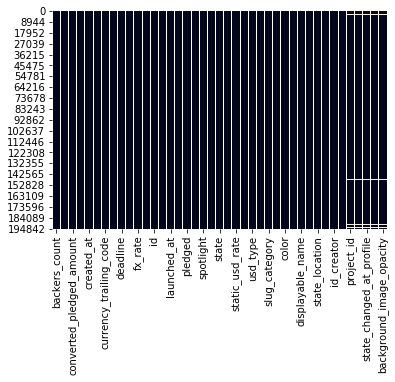

In [9]:
sns.heatmap(kickstarter.isnull(), cbar=False)

- Delete the 3% of rows that have missing information

In [10]:
kickstarter = kickstarter.dropna(axis=0)
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182175 entries, 0 to 205695
Data columns (total 41 columns):
backers_count               182175 non-null int64
blurb                       182175 non-null object
converted_pledged_amount    182175 non-null int64
country                     182175 non-null object
created_at                  182175 non-null datetime64[ns]
currency                    182175 non-null object
currency_trailing_code      182175 non-null bool
current_currency            182175 non-null object
deadline                    182175 non-null datetime64[ns]
disable_communication       182175 non-null bool
fx_rate                     182175 non-null float64
goal                        182175 non-null float64
id                          182175 non-null int64
is_starrable                182175 non-null bool
launched_at                 182175 non-null datetime64[ns]
name                        182175 non-null object
pledged                     182175 non-null float64
slug

We can save the cleaned data to a new csv file and use the new file for the rest of this project analysis.

In [11]:
kickstarter.to_csv('/Kickstarter_cleaned.csv')

## C. Preliminary Data Analysis

In [12]:
kickstarter = pd.read_csv('/Kickstarter_cleaned.csv')

### **Amount pledged vs goal**

Briefly check the relationship between amount pledged and goal for failed and successfull projects in order to see if setting high goals is beneficial.

Text(0.5, 1.0, 'Goal vs amount pledged in M USD')

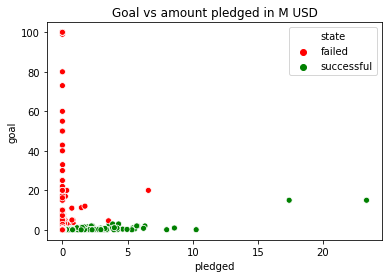

In [13]:
data_kick = kickstarter.loc[kickstarter['state'].isin(
            ['successful', 'failed'])]

ax = sns.scatterplot(data_kick.pledged/1e6, data_kick.goal/1e6, hue=data_kick.state, palette=['red','green'])
ax.set_title('Goal vs amount pledged in M USD')

There is a clear relationship that setting the goals high does not pay off well. In fact, projects with lower goals have pledged more money than the ones with very high goals.

**Implication for creators:** do not use kickstarter to launch projects with goals above 20M USD. In fact, it is  better to launch projects with lower goals (less than 5M USD)

**Implication for kickstarter :** try to further specialize on the lower budget projects (below 5 M USD) and make this evident to creators

### **Number of projects per state**

Text(0, 0.5, 'Number of projects')

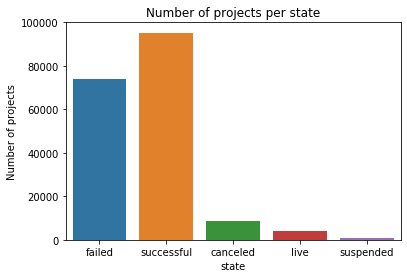

In [14]:
ax = sns.countplot(x='state',data=kickstarter)
ax.set_title("Number of projects per state")
ax.set_ylabel("Number of projects")

As predicted, most projects were either successfull or uncessful. Surprisingly, most of the projects were in fact succesful. Some are still live and only a few have been cancelled or suspended.

In [15]:
data_kick = kickstarter.loc[kickstarter['state'].isin(
            ['successful', 'failed','canceled state','suspended'])]

(data_kick.groupby('state')['id'].count()[1])*100/data_kick.groupby('state')['id'].count().sum()

56.09852344407994

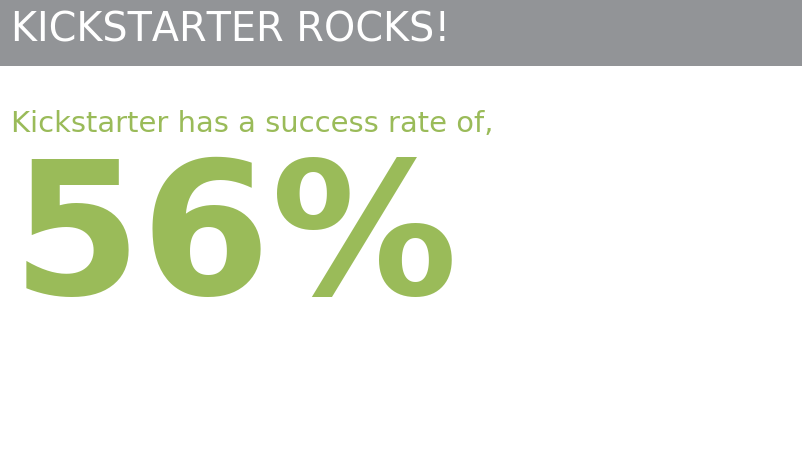

In [16]:
sns.reset_orig
# create new figure

fig2, ax2 = plt.subplots(figsize=(7.45, 4.9), dpi=110)

# remove chart border
for spine in ax2.spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
ax2.tick_params(axis='both', bottom='off', left='off', labelleft='off', labelbottom='off')

# titile the plot
ax2.text(-0.15, 1.03,
         'KICKSTARTER ROCKS!'+' '*27,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': '#929497', 'pad': 10, 'edgecolor': 'none'})

# add note to the plot
ax2.text(-0.15, 0.81,
         'Kickstarter has a success rate of,',
         fontsize=19,
         color='#9ABB59')

# add note to the plot
ax2.text(-0.15, 0.41,
         '$\\bf{56\%}$', # use mathtext \\bf for bold text
         fontsize=122,
         color='#9ABB59')

#Hide grid
ax2.grid(False)

# Hide axes ticks
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_facecolor('white')

### Exploring the Parent Category

In [17]:
# Get the parent gategory column
kickstarter['parent_category'] = kickstarter["slug_category"].str.split("/", n = 1, expand = True)[0].str.title()

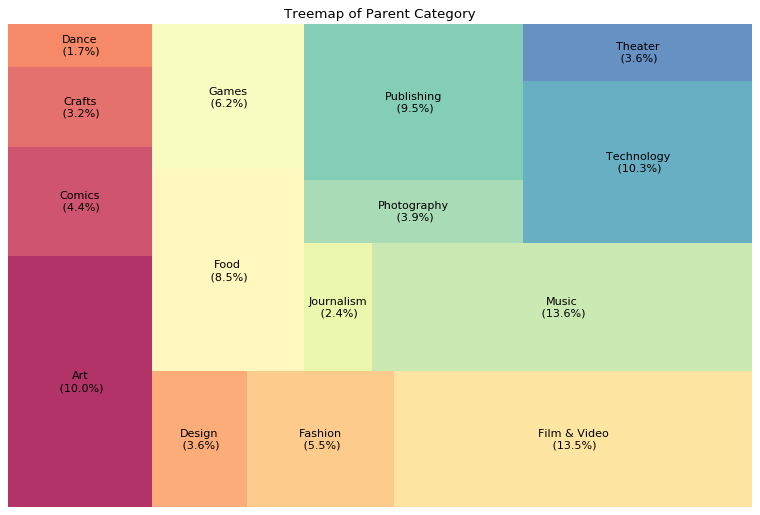

In [18]:
# Prepare Data
df = kickstarter.groupby('parent_category').size().reset_index(name='counts')
df['percent'] = round(df['counts']/df['counts'].sum()*100,1)
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[2]) + "%)", axis=1)
sizes = df['counts'].values.tolist()
percents = (df['counts']/df['counts'].sum()*100).values.tolist()
percents = ["{0:.0f}%".format(size) for size in sizes]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Parent Category')
plt.axis('off')
plt.show()

It can be seen that the most popular categories in terms of projects launched are Film & Video, Music and Technology while the least are Dance and Journalism.

### Average success rate by project category

Knowing which categories have the highest and lowest success rate is useful for both Kickstarter and creators.

In [19]:
# focus only on successful and unsuccesful prjects
data_kick = kickstarter.loc[kickstarter['state'].isin(
            ['successful', 'failed'])]

data_kick['success'] = data_kick['state'] == 'successful'

success = data_kick.groupby('parent_category')['success'].sum()/data_kick.groupby('parent_category')['success'].count()
success.sort_values(ascending=True ,inplace=True)
df = success.reset_index()
df['fail'] = 1 - df['success']

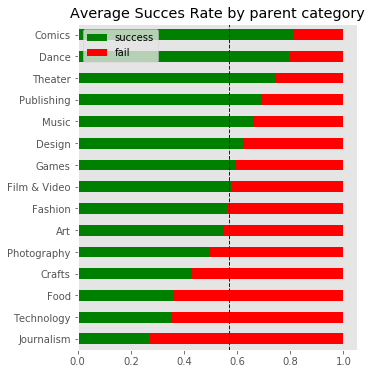

In [20]:
# drow the plot using the ggplot style

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(5, 6))
df.plot(kind='barh', y=["success", "fail"], x="parent_category", color=['green', 'red'], stacked= True, ax=ax)
avg = df['success'].mean()
ax.set(title='Average Succes Rate by parent category', xlabel='', ylabel='')
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
ax.grid(False)

On the graph above we can see the the comics and dance categories are the ones with the highest success rate. On the other hand, Journalism and Technology have success rates lower than 40%.
Interestingly, as we seen from previous graph, Journalism has the least competition and the lowest success rate. On the other hand, technology is one of the most popular but at the same time one with third lowest success rate.


### Average goal for successful and unsuccessful project

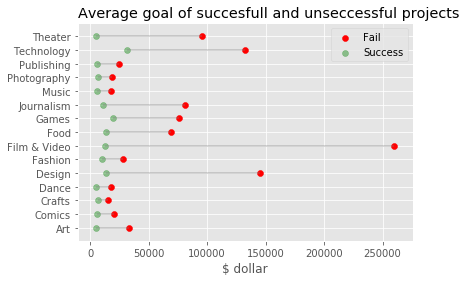

In [21]:
avggoal = data_kick.pivot_table(values = 'goal', index = 'parent_category', columns='success', aggfunc='mean').reset_index()
my_range = range(0,len(avggoal.index))
plt.hlines(y=my_range, xmin=avggoal[1], xmax=avggoal[0], color='grey', alpha=0.4)
plt.scatter(avggoal[0], avggoal['parent_category'], color='red', alpha=1, label='Fail')
plt.scatter(avggoal[1], avggoal['parent_category'], color='green', alpha=0.4 , label='Success')
plt.legend()
plt.title("Average goal of succesfull and unseccessful projects", loc='left')
plt.xlabel('$ dollar');


It can be seen that on average goals for unsuccessful projects are significantly higher than for successful projects. This discrepancy is most significant in the areas of Film & Video and Design.

**Implication for creators:** lower and more realistic goals are preferred

**Implications for kickstarter:** revise goal set by creators and advise them to make them more realistic

## 1. The Role of Timing

Projects can be created and published whenever the creator wants to. However, the position on the website changes when time goes by. The longer a project is online, the less prominent is its position on the Kickstarter website. Accordingly, a project gets the most attention shortly after being posted. In the following we want to check for a potential correlation between the timing of publishing a project and the success rate of a project. Furthermore, the projects change their status once the deadline passes. It is then considered either successful if the goal is achieved or considered as a failure. We want to evaluate how the time between creation and deadline correlates with the success of a project, because we assume that long lasting projects are more likely to fail (either projects succeed fast, or they never succeed).

First two new rows for the Data Frame are created, where the time of creation and time of status change are converted to datetime to facilitate the analysis.

In [22]:
#time of creation to datetime
kickstarter['created_at_datetime'] = pd.to_datetime(kickstarter.launched_at)
#time of status change to datetime
kickstarter['state_changed_at_datetime'] = pd.to_datetime(kickstarter.state_changed_at)

### Success rate and money pledged by year

Firstly the success of projects depending on the year they were launched in shall be tested. Therefore, the absolute money pledged by the projects per year is displayed in the bar chart, while the success rate is displayed in the line chart above.

Text(0, 0.5, 'Money pledged [$]')

<Figure size 432x288 with 0 Axes>

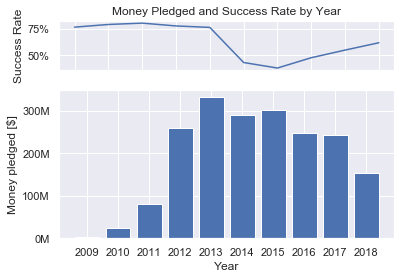

In [23]:
sns.set()

#create a dataframe that contains the money pledged grouped by year
pledged_by_year = kickstarter.groupby(kickstarter['created_at_datetime'].dt.strftime('%Y'))['converted_pledged_amount'].sum()

pledged_by_year.index = pd.to_datetime(pledged_by_year.index)
pledged_by_year.sort_index(inplace=True)
pledged_by_year.index = pledged_by_year.index.strftime('%Y')

#print(pledged_by_year)

#calculate the success ratio per year by dividing the amount of successful projects by the total amount of projects (except projects with status 'live')
year_success = kickstarter[kickstarter['state'] == 'successful'].groupby(kickstarter['created_at_datetime'].dt.strftime('%Y'))['converted_pledged_amount'].size()
year_successfail = kickstarter[kickstarter['state'].isin(['successful', 'failed'])].groupby(kickstarter['created_at_datetime'].dt.strftime('%Y'))['converted_pledged_amount'].size()
year_successratio = (year_success/year_successfail)*100

year_successratio.index = pd.to_datetime(year_successratio.index)
year_successratio.sort_index(inplace=True)
year_successratio.index = year_successratio.index.strftime('%Y')

#print(year_successratio)

#create the two figures above each other
fig = plt.figure()
fig, (ax1, ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})

#for the upper plot create a line chart displaying the success rate
ax1.plot(year_successratio)

ax1.axes.xaxis.set_ticklabels([])

ylabels = ['{:,.0f}'.format(x) + '%' for x in ax1.get_yticks()]
ylabels = ax1.set_yticklabels(ylabels)

ax1.set_ylabel('Success Rate')

ax1.set_title("Money Pledged and Success Rate by Year")

#for the lower plot create a bar chart to display the money pledged
ax.bar(pledged_by_year.index, pledged_by_year)

ylabels = ['{:,.0f}'.format(x) + 'M' for x in ax.get_yticks()/1000000]
y_labels = ax.set_yticklabels(ylabels)


ax.set_xlabel('Year')
ax.set_ylabel('Money pledged [$]')

Text(0, 0.5, 'Amount of Projects')

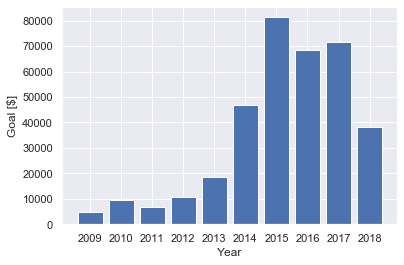

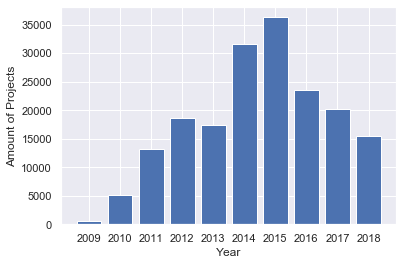

In [24]:
#check for mean goal set for the projects by year

goal_by_year = kickstarter.groupby(kickstarter['created_at_datetime'].dt.strftime('%Y'))['goal'].mean()

goal_by_year.index = pd.to_datetime(goal_by_year.index)
goal_by_year.sort_index(inplace=True)
goal_by_year.index = goal_by_year.index.strftime('%Y')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(goal_by_year.index, goal_by_year)

ax.set_xlabel('Year')
ax.set_ylabel('Goal [$]')

#check for amout of projects by year

projects_by_year = kickstarter.groupby(kickstarter['created_at_datetime'].dt.strftime('%Y'))['id'].count()

projects_by_year.index = pd.to_datetime(projects_by_year.index)
projects_by_year.sort_index(inplace=True)
projects_by_year.index = projects_by_year.index.strftime('%Y')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.bar(projects_by_year.index, projects_by_year)

ax1.set_xlabel('Year')
ax1.set_ylabel('Amount of Projects')

**Implications for creators:**


Since 2015 the success rate is constantly increasing while money pledged is decreasing. This is because there are less projects on the platform, so competition is decreasing, but also because the goals of the projects are lower in general. Therefore, conditions to pledge money on Kickstarter improved.

**Implications for Kickstarter:**

Kickstarter has to maximize the money pledged via its platform. Therefore, the development is worrying and Kickstarter should promote its platform to attract more projects.

### Success rate and money pledged by month

To check for seasonal influence on the success of projects the success rate and money pledged per month is displayed in the following visualization.

Text(0, 0.5, 'Money pledged in USD [$]')

<Figure size 432x288 with 0 Axes>

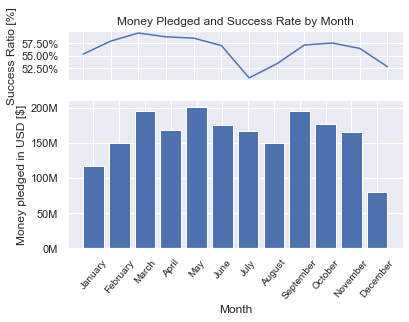

In [25]:
sns.set()

#create a dataframe that contains the money pledged grouped by month

pledged_by_month = kickstarter.groupby(kickstarter['created_at_datetime'].dt.strftime('%m %B'))['converted_pledged_amount'].sum()
pledged_by_month.index = [ x.split()[1] for x in pledged_by_month.index ]

#print(pledged_by_month)

#calculate the success ratio per month by dividing the amount of successful projects by the total amount of projects (except projects with status 'live')

month_success = kickstarter[kickstarter['state'] == 'successful'].groupby(kickstarter['created_at_datetime'].dt.strftime('%m %B'))['converted_pledged_amount'].size()
month_successfail = kickstarter[kickstarter['state'].isin(['successful', 'failed'])].groupby(kickstarter['created_at_datetime'].dt.strftime('%m %B'))['converted_pledged_amount'].size()
month_successratio = (month_success/month_successfail)*100

month_successratio.index = [ x.split()[1] for x in month_successratio.index ]

#print(month_successratio)

#create two figures above each other
fig = plt.figure()
fig, (ax1, ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})

#for the upper plot create a line chart displaying the success rate

ax1.plot(month_successratio)

ax1.axes.xaxis.set_ticklabels([])

ylabels = ['{:,.2f}'.format(x) + '%' for x in ax1.get_yticks()]
y_labels = ax1.set_yticklabels(ylabels)

ax1.set_ylabel('Success Ratio [%]')

ax1.set_title("Money Pledged and Success Rate by Month")

#for the lower plot create a bar chart to display the money pledged

ax.bar(pledged_by_month.index, pledged_by_month)

x_labels = ax.set_xticklabels(pledged_by_month.index, rotation=50, fontsize='small')

y_axis = ax.set_ylim(ymin = 0)
ylabels = ['{:,.0f}'.format(x) + 'M' for x in ax.get_yticks()/1000000]
y_labels = ax.set_yticklabels(ylabels)


ax.set_xlabel('Month')
ax.set_ylabel('Money pledged in USD [$]')

**Implications for creators:**

Creators should publish their projects in the months February, March, April, and May since the success ratio in those months is the highest and also the absolute value of money pledged peaks. Therefore publishing projects in those months promises success. Creators should especially avoid July to publish projects since the success ratio is around 10% lower than in the most successful month March. 

**Implications for Kickstarter:**

Kickstarter could try to increase traffic on the platform in July and December to increase success rate and money pledged. However, this might be difficult or even impossible, since the differences probably result from seasonal effects (vacation, christmas).

### Success rate and money pledged by hour

Since the hour of the day might also have an influence on the success of a project since it is displayed more prominently right after it is published the success rate and money pledged per hour is displayed in the following graph.

Text(0, 0.5, 'Money Pledged [$]')

<Figure size 432x288 with 0 Axes>

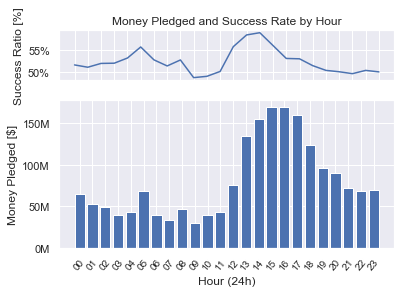

In [26]:
sns.set()

#create a dataframe that contains the money pledged grouped by hour of the day

pledged_by_hour = kickstarter.groupby(kickstarter['created_at_datetime'].dt.strftime('%H'))['converted_pledged_amount'].sum()

#print(pledged_by_hour)

#calculate the success ratio per hour of the day by dividing the amount of successful projects by the total amount of projects (except projects with status 'live')

hour_success = kickstarter[kickstarter['state'] == 'successful'].groupby(kickstarter['created_at_datetime'].dt.strftime('%H'))['converted_pledged_amount'].size()
hour_successfail = kickstarter[kickstarter.isin(['successful', 'failed'])].groupby(kickstarter['created_at_datetime'].dt.strftime('%H'))['converted_pledged_amount'].size()
hour_successratio = (hour_success/hour_successfail)*100

#print(hour_successratio)

#create two figures above each other

fig = plt.figure()
fig, (ax1, ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})

#for the upper plot create a line chart displaying the success rate

ax1.plot(hour_successratio)

ax1.axes.xaxis.set_ticklabels([])

ylabels = ['{:,.0f}'.format(x) + '%' for x in ax1.get_yticks()]
y_labels = ax1.set_yticklabels(ylabels)

ax1.set_ylabel('Success Ratio [%]')

ax1.set_title("Money Pledged and Success Rate by Hour")

#for the lower plot create a bar chart to display the money pledged

ax.bar(pledged_by_hour.index, pledged_by_hour)

x_labels = ax.set_xticklabels(pledged_by_hour.index, rotation=50, fontsize='small')

y_axis = ax.set_ylim(ymin = 0)
ylabels = ['{:,.0f}'.format(x) + 'M' for x in ax.get_yticks()/1000000]
y_labels = ax.set_yticklabels(ylabels)


ax.set_xlabel('Hour (24h)')
ax.set_ylabel('Money Pledged [$]')

**Implications for creators:**

Creators should publish their projects in the afternoon because success rates are up to 10% higher during those times of the day. When creators launch their projects they should also take into consideration time zones.

### Project duration by category

Text(0.5, 0, 'Days Between Launch and Status Change')

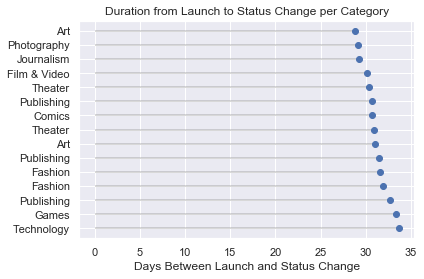

In [27]:
kickstarter['parent_category'] = kickstarter["slug_category"].str.split("/", n = 1, expand = True)[0].str.title()

launch_status_change = kickstarter['state_changed_at_datetime'] - kickstarter['created_at_datetime']
kickstarter['launch_status_change'] = pd.Series([x.days for x in launch_status_change])
launch_status_change_mean = kickstarter.groupby('parent_category', as_index = True)['launch_status_change'].mean().sort_values(ascending = False)

my_range = range(0 ,len(launch_status_change_mean.index))

plt.hlines(y=my_range, xmin=0, xmax = launch_status_change_mean, color='grey', alpha=0.4)
plt.plot(launch_status_change_mean, my_range, 'o')
plt.yticks(my_range, kickstarter['parent_category'])
plt.title("Duration from Launch to Status Change per Category")
plt.xlabel('Days Between Launch and Status Change')

Projects tend to have an average duration between 4 and 5 weeks.

### Project duration by category and project state

Text(0.5, 0, 'Days Between Launch and Status Change')

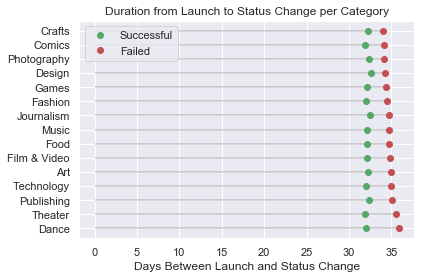

In [28]:
kickstarter['parent_category'] = kickstarter["slug_category"].str.split("/", n = 1, expand = True)[0].str.title()


kickstarter_success = kickstarter.loc[kickstarter['state'] == 'successful']
kickstarter_failed = kickstarter.loc[kickstarter['state'] == 'failed']

launch_status_change_success = kickstarter_success['state_changed_at_datetime'] - kickstarter_success['created_at_datetime']
kickstarter_success['launch_status_change_success'] = pd.Series([x.days for x in launch_status_change_success])
launch_status_change_mean_success = pd.DataFrame(kickstarter_success.groupby('parent_category', as_index = True)['launch_status_change_success'].mean())

launch_status_change_failed = kickstarter_failed['state_changed_at_datetime'] - kickstarter_failed['created_at_datetime']
kickstarter_failed['launch_status_change_failed'] = pd.Series([x.days for x in launch_status_change_failed])
launch_status_change_mean_failed = pd.DataFrame(kickstarter_failed.groupby('parent_category', as_index = True)['launch_status_change_failed'].mean())

launch_status_change_mean_comp = launch_status_change_mean_success
launch_status_change_mean_comp.columns.values[0] = "success" 
launch_status_change_mean_comp['failed'] = launch_status_change_mean_failed

launch_status_change_mean_comp['max'] = launch_status_change_mean_comp[['success', 'failed']].values.max(1)
launch_status_change_mean_comp.sort_values(by = 'max', ascending = False, inplace=True)

my_range = range(0 ,len(launch_status_change_mean_comp.index))

plt.hlines(y=my_range, xmin=0, xmax = launch_status_change_mean_comp['max'], color='grey', alpha=0.4)
plt.plot(launch_status_change_mean_comp['success'], my_range, 'go', label = 'Successful')
plt.plot(launch_status_change_mean_comp['failed'], my_range, 'ro', label = 'Failed')
plt.yticks(my_range, launch_status_change_mean_comp.index)
plt.legend()
plt.title("Duration from Launch to Status Change per Category")
plt.xlabel('Days Between Launch and Status Change')

**Implications for the creators:**

The average time between launch and status change (which is equivalent to the deadline) is more or less the same in all categories. Therefore, no differenciation has to be made inbetween them when setting the deadline. However, successful projects have a lower time between launch and deadline on average. This could also be because creators of successful projects are convinced that it will not take them long to pledge the money. In total, the time difference between launch and deadline has no significant implications for the creators.

## 2. **The Role of Location**

In this section we analyse how the location choice on the platform can influence the success of a crowdfunding project. Additionally, we analyse in which country the creators should launch their project based on the category, in order to maximize the outcome. We are only analysing the top 20% countries, which are the ones that have above 78 projects founded.

### Succes rate of project by country
- the mean sucess rate among the selected countries is 53.84%;
- by looking at the bar plot below we can conclude that certain countries such as, _United States, Japan, Hong Kong, China, Israel, Korea, South Africa, Argentina, Czechia, Indonesia, Russia, and Taiwan_- are more sucessfull in completing the project than the other.

In [29]:
## new dataframe which group by country the succesful rate % - excluding the Live project
by_loc_success=kickstarter[kickstarter["state"]=="successful"].groupby(['country_location']).size()/kickstarter[kickstarter["state"]!="live"].groupby(['country_location']).size()*100
by_loc_success=pd.DataFrame(by_loc_success).reset_index()
by_loc_success['percent']=round(by_loc_success.iloc[:,1],0)
by_loc_success.sort_values(by='percent',axis=0, ascending=False, inplace=True)

In [30]:
## create a dataframe by total number of project grouped by countries.
tot_n=kickstarter[kickstarter["state"]!="live"].groupby(['country_location']).size()
tot_n.sort_values(axis=0, ascending=False, inplace=True)
tot_n=pd.DataFrame(tot_n).reset_index()
tot_n['num']=tot_n.iloc[:,1]

In [31]:
## split the dataframe in bins at the 20th,40th,60th,80th quantile
tot_n['qbin']=pd.qcut(tot_n['num'],q=[0, .2, .4, .6, .8, 1]) 

In [32]:
## merge the two dataframe together based on 'country_location'
by_loc_kickstarter=pd.DataFrame.merge(tot_n, by_loc_success,
                        on='country_location',
                        how='outer')
by_loc_kickstarter.drop(by_loc_kickstarter.columns[1], axis=1,inplace=True) ## drop missing value by row
by_loc_kickstarter.drop(by_loc_kickstarter.columns[3], axis=1,inplace=True) ## drop missing value by row

In [33]:
## dummy variable to separete the countries above and below the mean
dummy_state=[]
for i in by_loc_kickstarter['percent']:
      if i>= round(np.mean(by_loc_kickstarter['percent']),2):
        dummy_state.append("Above mean")
      else:
        dummy_state.append("Below mean")
by_loc_kickstarter['dummy_mean']=dummy_state

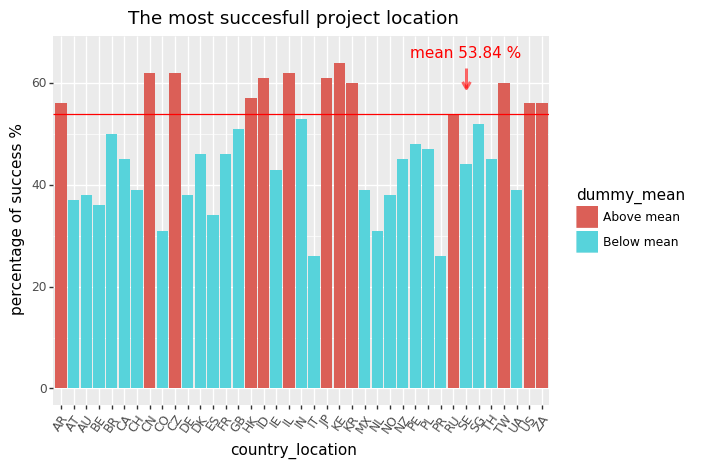

<ggplot: (7594225121)>

In [34]:
## plot the data
ggplot(by_loc_kickstarter[by_loc_kickstarter['num']>77],aes(y='percent',x='country_location',fill='dummy_mean'))+\
geom_bar(stat='identity')+ylab('percentage of success %')+\
labs(title='The most succesfull project location')+\
theme(axis_text_x = element_text(angle = 55))+\
geom_hline(yintercept = np.mean(by_loc_kickstarter['percent']), color='red')+\
annotate("segment", x = 33, xend = 33, y = 63, yend = 59, colour = "red", size=1.2, alpha=0.6, arrow=arrow(length=0.1))+\
annotate('text',x = 33,label='mean {} %'.format(round(np.mean(by_loc_kickstarter['percent']),2)), y = 66, colour = "red")


### Interactive map of countries with higher sucess rates

The interactive map underlines the countries where project sucess rates are above the mean. 

In [35]:
## list of countries above the mean
top_succ_loc=by_loc_kickstarter[(by_loc_kickstarter['percent']>=np.mean(by_loc_kickstarter['percent']))\
                  &(by_loc_kickstarter['num']>78)]['country_location']

## sort the dataframe by list of countries above mean
df_loc=by_loc_kickstarter[by_loc_kickstarter['country_location'].isin(list(top_succ_loc))]

In [36]:
input_countries=list(df_loc['country_location'])

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.alpha_3

## list of three digit code for countries
codes = [countries.get(country, 'Unknown code') for country in input_countries] 

In [37]:
countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name
## list of countries' name 
codes_names = [countries.get(country, 'Unknown code') for country in input_countries]


In [38]:
data = [ dict(
        type = 'choropleth',
        locations = codes,
        z = list(df_loc['percent']),
        text = codes_names,
        
        
        colorscale = 'Blues',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(90, 120, 245)',
                width = 0.8
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '%',
            title = 'Success rate'),
      ) ]

layout = dict(
    title = "Most successfull countries on Kickstarter",
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### Project sucess rate by country and category

The interactive map helps creators target specific categories within their target country that will ultimately help them to achieve sucessful crowdfunding campaigns.

In [39]:
## manipulate the 'slug_category' column to create more omogeneous categories
extended_list_category=kickstarter['slug_category']
category=[]
for i in extended_list_category:
    catg=i.split('/')
    category.append(catg[0])
len(category)
kickstarter['category']=category

## create a dataframe by total number of project grouped by countries and category class.
tot_n_category=kickstarter[kickstarter["state"]!="live"].groupby(['country_location','category']).size()
tot_n_category=pd.DataFrame(tot_n_category).reset_index()
tot_n_category['num_cat']=tot_n_category.iloc[:,2]
tot_n_category.drop(tot_n_category.columns[2], axis=1,inplace=True)
tot_n_category=tot_n_category.dropna()

## create a dataframe of the rate of project' success grouped by countries and category class.
by_loc_cat_success=kickstarter[kickstarter["state"]=="successful"].groupby(['country_location','category']).size()/kickstarter[kickstarter["state"]!="live"].groupby(['country_location','category']).size()*100
by_loc_cat_success=pd.DataFrame(by_loc_cat_success).reset_index()
by_loc_cat_success['percent %']=by_loc_cat_success.iloc[:,2]
by_loc_cat_success.drop(by_loc_cat_success.columns[2], axis=1,inplace=True)
by_loc_cat_success=by_loc_cat_success.dropna()

## merge the two dataframes together
by_loc_cat_kickstarter=pd.DataFrame.merge(by_loc_cat_success, tot_n_category,
                        on=['country_location','category'],
                        how='outer')
by_loc_cat_kickstarter=by_loc_cat_kickstarter.dropna()
## data curation select the top category per highest percentage of success and in case of same rate highest number of project launched
by_loc_cat_kickstarter=by_loc_cat_kickstarter[by_loc_cat_kickstarter['num_cat']>1]
lc=set(by_loc_cat_kickstarter['country_location'])

## loop
c1=[]
for c in lc:
    group=by_loc_cat_kickstarter[by_loc_cat_kickstarter['country_location']==c]
    for p in group['percent %']:
        if (p==group['percent %'].max()):
            c1.append([c,p])
                    
max_perct=pd.DataFrame(c1)
max_perct.columns=['country_location','percent %']
max_perct.drop_duplicates(inplace=True)


max_perct=max_perct.merge(by_loc_cat_kickstarter, on=['country_location','percent %'])



In [40]:
input_countries=list(max_perct['country_location'])

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

codes_names = [countries.get(country, 'Unknown code') for country in input_countries]

max_perct['Country']=codes_names

## create string data for map
text=[] 
for row in range(len(max_perct)):
    elm= str(max_perct.iloc[row][2])+ ', #'+str(max_perct.iloc[row][3])
    text.append(elm)
max_perct['text']=text
max_perct['percent %']=round(max_perct['percent %'],2)

hh=max_perct.set_index('country_location').groupby(level=0)['text'].apply(lambda x: '<br>'.join(x)).reset_index()
max_perct=max_perct.merge(hh, on=['country_location'])

In [41]:
## create string data for map
text=[]
for row in range(len(max_perct)):
    elm=  str(max_perct.iloc[row][4])+'<br>'+str(max_perct.iloc[row][6])
    text.append(elm)
max_perct['text']=text
max_perct[max_perct['country_location']=='US']
max_perct['percent %']=round(max_perct['percent %'],2)

data = [ dict(
        type = 'choropleth',
        locations = codes,
        z = list(max_perct['percent %']),
        text = max_perct['text'],
                
        
        colorscale = 'Greens',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(106, 137, 247)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '%',
            title = 'Success rate'),
      ) ]

layout = dict(
    title = "Most successfull categories and their respective success rates per country",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

**Implications for creators:**

The map can be used by potential creators to get inspiration and market knowledge on their target country to decide in which category they might invest in by analysing the most successful categories per country.

**Implications for Kickstarter:**

The interactive map can be posted in the Kickstarter's website to underline so far the rate of success of each country, to help potential creators choosing a category depending on their desired country.

Kickstarter can use the map to further promote (i.e. through marketing campaigns) successful categories in the respective country.

## 3. **The Role of the Creator**

In this section we analyse how the creator's past experience can influence the success of a crowdfunding project. Additionally, we also look at creators' specialization in a single category as this is believed to increase the chance of success. Finally, we also look into the number of backers based on a creators' past experience. The community effect dictates that the more projects a creator funds, the higher the number of backers.

### Experience vs Project success rate

In [42]:
#create a matrix where each row identifies a creator and each column a project (ordered by creation date)

projects = kickstarter.loc[kickstarter['state'].isin(['successful','failed'])]
projects = projects.sort_values(by=['created_at'],ascending=False)
table = pd.DataFrame(projects.groupby(['id_creator'])['state'].apply(list))
matrix = pd.DataFrame(table['state'].values.tolist())
matrix.head()

0           1           2     3     4     5     6     7     8   \
0  successful  successful        None  None  None  None  None  None  None   
1  successful  successful        None  None  None  None  None  None  None   
2  successful  successful        None  None  None  None  None  None  None   
3  successful      failed  successful  None  None  None  None  None  None   
4      failed        None        None  None  None  None  None  None  None   

     9   ...    71    72    73    74    75    76    77    78    79    80  
0  None  ...  None  None  None  None  None  None  None  None  None  None  
1  None  ...  None  None  None  None  None  None  None  None  None  None  
2  None  ...  None  None  None  None  None  None  None  None  None  None  
3  None  ...  None  None  None  None  None  None  None  None  None  None  
4  None  ...  None  None  None  None  None  None  None  None  None  None  

[5 rows x 81 columns]

In [43]:
# create a dataframe with a summary of the number of previous projects and success rates

success_list = []
    
for i in matrix:
    try:
        success_rate = matrix[i].value_counts()[0]*100/(matrix[i].value_counts()[1]+matrix[i].value_counts()[0])
        success_list.append(success_rate)

    except IndexError:
        success_rate = matrix[i].value_counts()[0]*100/(matrix[i].value_counts()[0])
        success_list.append(success_rate)
        
success_list = pd.DataFrame(success_list).reset_index().rename(columns={'index':'Previous projects #',0:'Success Rate (%)'})

creators_number = pd.DataFrame(matrix.notnull().sum())

df = success_list.join(creators_number).rename(columns={0:'# Creators'})

df.head(30)

Previous projects #  Success Rate (%)  # Creators
0                     0         53.717400      147509
1                     1         67.724828       13199
2                     2         77.291842        3567
3                     3         84.316186        1594
4                     4         88.751406         889
5                     5         89.679715         562
6                     6         88.946015         389
7                     7         86.692015         263
8                     8         86.432161         199
9                     9         90.849673         153
10                   10         91.666667         120
11                   11         90.816327          98
12                   12         92.307692          78
13                   13         95.238095          63
14                   14         91.228070          57
15                   15         90.000000          50
16                   16        100.000000          37
17                   17         90.322581          31
18                   18         93.103448          29
19                   19         96.000000          25
20                   20         91.304348          23
21                   21         94.736842          19
22                   22        100.000000          18
23                   23        100.000000          17
24                   24        100.000000          15
25                   25        100.000000          12
26                   26         90.909091          11
27                   27        100.000000          10
28                   28        100.000000           9
29                   29        100.000000           7

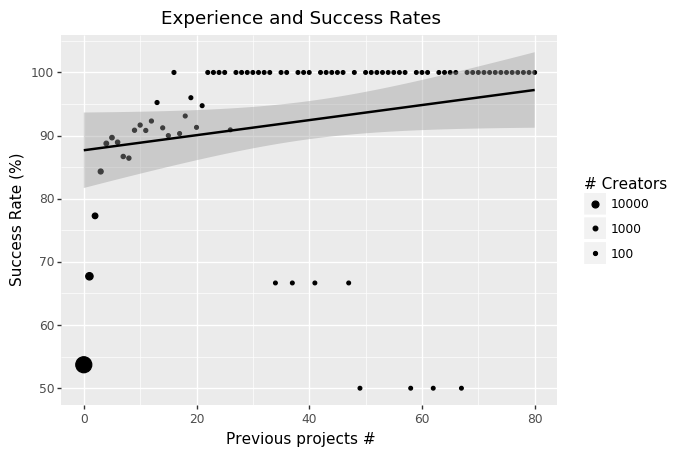

<ggplot: (7590616717)>

In [44]:
#to get the overall picture plot the graph including all values

ggplot(df, aes(x= 'Previous projects #', y='Success Rate (%)')) +\
    geom_point((aes(size='# Creators'))) + geom_smooth(method = 'lm')+\
    scale_size_continuous (breaks=(10000,1000,100)) + ggtitle("Experience and Success Rates")

- the success rate of the unexperienced (no previous projects) is around 54%.
- less than 10% of the creators start a second project
- after funding 20 projects the success rate of funding further projects is close to 100%.
- less than 10 people fund more than 27 projects. Therefore for the analysis we should focus on the sample that creates less than 30 projects.

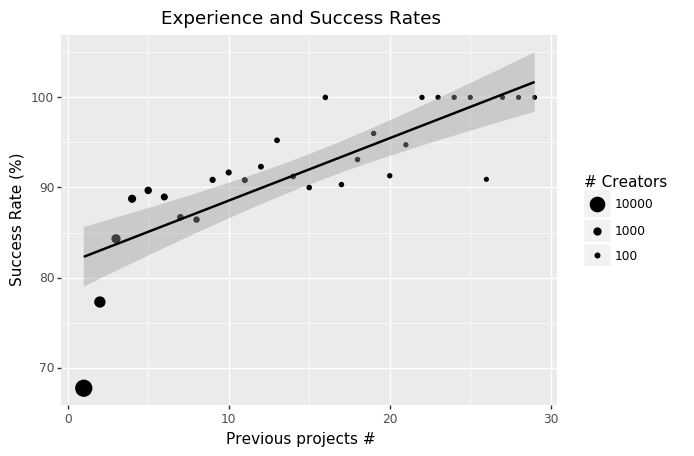

<ggplot: (-9223372029264340778)>

In [45]:
#focus on the most significant sample: people who created less than 30 projects

df1 = df[1:30]
ggplot(df1, aes(x= 'Previous projects #', y='Success Rate (%)')) +\
    geom_point((aes(size='# Creators'))) + geom_smooth(method = 'lm')+\
    scale_size_continuous (breaks=(10000,1000,100)) + ggtitle("Experience and Success Rates")

The success rate increases on average with the number of previous projects created. This indicates there is a positive correlation between experience and success rate.

### Experience and Specialization vs Success Rate

In [46]:
#add category specialization to the existing dataframe

table1 = pd.DataFrame(projects.groupby(['id_creator'])['parent_category'].apply(list))
matrix1 = pd.DataFrame(table1['parent_category'].values.tolist())

change_list = []
    
# category specialization is defined as the probability of a creator sticking
# with the same category of the previous project 
    
for i in matrix1:
    if i == 0:
        change_list.append(0)
    else:
        mask = matrix1[matrix1[i-1].notnull()]
        change_rate = (mask[i]==mask[i-1]).sum()/(mask[i]==mask[i-1]).count()*100
        change_list.append(change_rate)

df['Category Specialization (%)'] = change_list

df.head()

Previous projects #  Success Rate (%)  # Creators  \
0                    0         53.717400      147509   
1                    1         67.724828       13199   
2                    2         77.291842        3567   
3                    3         84.316186        1594   
4                    4         88.751406         889   

   Category Specialization (%)  
0                     0.000000  
1                     7.032791  
2                    21.524358  
3                    37.146061  
4                    46.361355

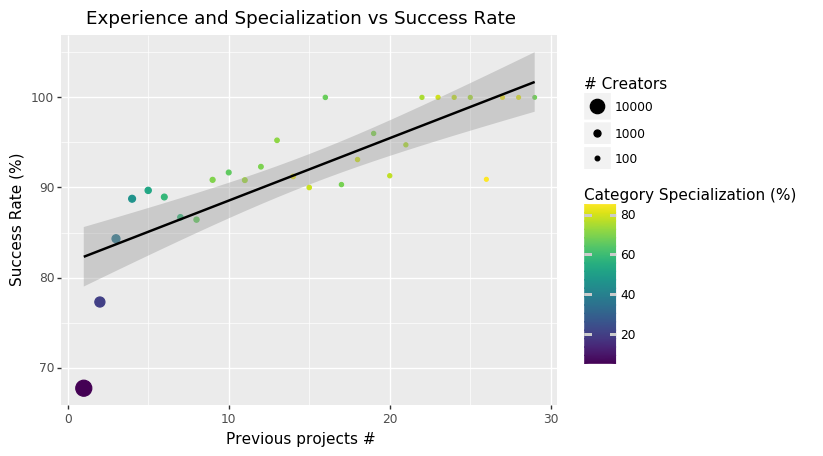

<ggplot: (-9223372029264331341)>

In [47]:
df2 = df[1:30]
ggplot(df2, aes(x= 'Previous projects #', y='Success Rate (%)')) +\
    geom_point((aes(color='Category Specialization (%)', size='# Creators'))) + geom_smooth(method = 'lm')+\
    scale_size_continuous (breaks=(10000,1000,100)) + ggtitle("Experience and Specialization vs Success Rate")

- As we move along more projects created, the category specialization increases. Therefore, the more projects a person creates, the more likely he/she is to specialize and stick with that category for futher projects.
- This also has an impact on the success rate, as specialization increases, so does the success rate.
- The increase in success rate can be credited to both increase in specialization and more experience.

### Community Effect

In [48]:
#add community to the existing dataframe

table2 = pd.DataFrame(projects.groupby(['id_creator'])['backers_count'].apply(list))
matrix2 = pd.DataFrame(table2['backers_count'].values.tolist())

com_list = []
    
# community is defined as the number of backers of a project
# median per project number was used to decrease the impact of outliers

for i in matrix2:
    community = matrix2[i].median()
    com_list.append(community)

df['Community Size'] = com_list

df.head(10)

Previous projects #  Success Rate (%)  # Creators  \
0                    0         53.717400      147509   
1                    1         67.724828       13199   
2                    2         77.291842        3567   
3                    3         84.316186        1594   
4                    4         88.751406         889   
5                    5         89.679715         562   
6                    6         88.946015         389   
7                    7         86.692015         263   
8                    8         86.432161         199   
9                    9         90.849673         153   

   Category Specialization (%)  Community Size  
0                     0.000000            23.0  
1                     7.032791            42.0  
2                    21.524358            59.0  
3                    37.146061            73.0  
4                    46.361355            83.0  
5                    52.418448            71.5  
6                    57.829181            73.0  
7                    57.583548            75.0  
8                    65.019011            76.0  
9                    68.844221            66.0

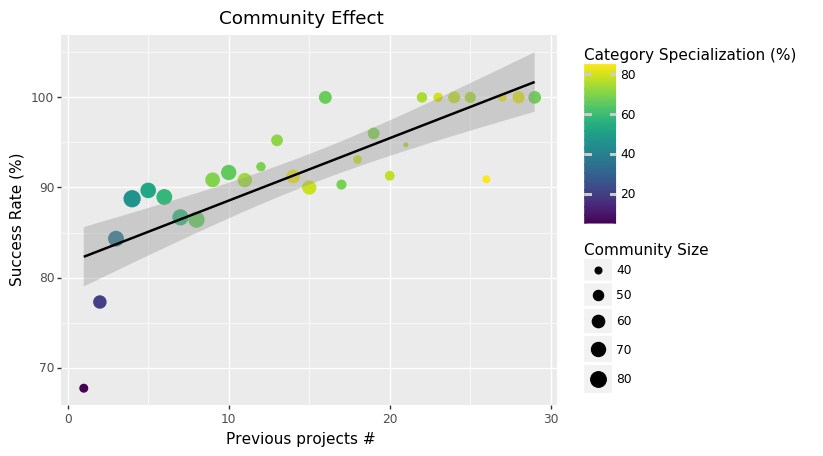

<ggplot: (7629708352)>

In [49]:
df3 = df[1:30]
ggplot(df3, aes(x= 'Previous projects #', y='Success Rate (%)')) +\
    geom_point((aes(color='Category Specialization (%)', size='Community Size'))) + geom_smooth(method = 'lm') \
    + ggtitle("Community Effect")

- The community size increases on average up to the 10th project, at which point the median number of backers stabilizes between 40 to 60.
- This result suggests that initially there might be some community build up.
- It should be noted that these results might still be biased due to the significant difference between backers_count in successful and unsuccessful projects.

**Implications for creators:**

This data incentivizes creators to invest in further projects, given the higher success rates. Additionally, creators are also incentivized to focus on a single category as specialization might increase the probability of a successful project.

**Implications for Kickstarter:**

Kickstarter makes money out of successful projects, therefore it is in its best interests to help creators in being successful. The above data analysis suggests experience and specialization can increase the success rate of a project. Kickstarter could collect lessons learnt from successfull creators to share with first timers, in order to increase their chances (i.e. in the form of a guide). Additionally, less than 10% of creators create a second project - Kickstarter could incentivise creators to set up further projects by sharing with them the optimistic results above. Lastly, there is limited evidence of the community effect for Kickstarter projects, this could be improved with the introduction of a "FOLLOW" button for creators. This way users would be able to track more easily their favorite creators and sponsor them. This is likely to have a positive impact on both success rates and pledged amounts. The Follow button was only implemented on kickstarter in the end of 2016, therefore our dataset (2009-2018) might not yet reveal the full effect of this change. This button should be advertised and backers should be incentivised to follow the creators they back.

## 4. The Role of Backers

Backers are a fundamental part of a crowdfunding project. What makes a project more popular around backers? Are some categories more popular amongst people? Do projects with a higher number of backers pledge higher amounts? 

### Number of backers per category

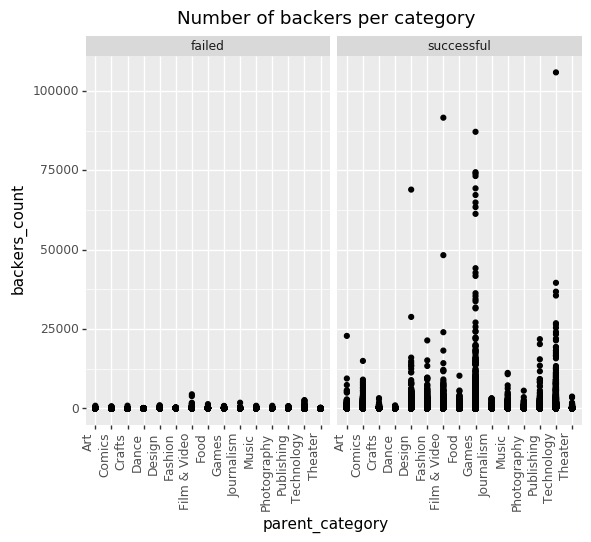

<ggplot: (-9223372029225051346)>

In [50]:
backers = kickstarter.loc[kickstarter['state'].isin(['successful','failed'])]
backers
ggplot(backers, aes(x='parent_category', y='backers_count')) + \
     geom_point() + theme(axis_text_x = element_text(angle=90, hjust=1)) + facet_wrap(['state'])+ \
    ggtitle("Number of backers per category")

- Unsuccessful projects have a very low number of backers, while the successful projects have in general a great number of backers
- Number of backers is expecially high in Games category, followed by the Technology category which demonstrates these might be more popular amongst people

### Backers count and pledged amount

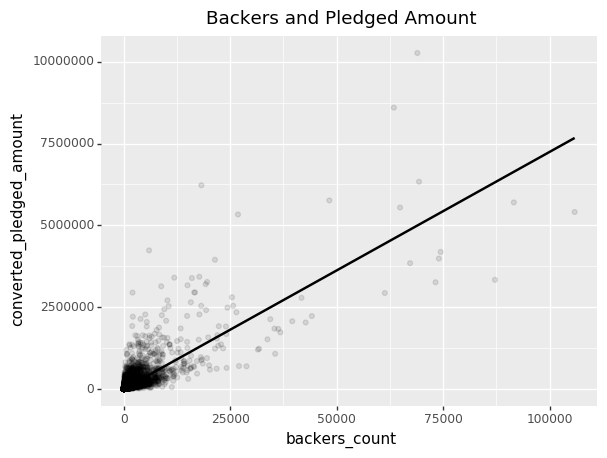

<ggplot: (-9223372029264628676)>

In [51]:
ggplot(kickstarter, aes(x='backers_count', y='converted_pledged_amount')) + \
     geom_point(alpha=0.1) + geom_smooth(method = 'lm') + ggtitle("Backers and Pledged Amount")

#### Interim analysis:
- There is an upward trend between pledged amount and the number of backers

## 5. **The Role of Competition**

It is only logical to assume that with increased competition within a category, the lower the chances a project has of receiving crowdfunding money as backers attention will be divided between many other projects. In this section we will use the total number of projects per parent category as an approximation number for competition. We will then compare the success rate per category to understand its relationship with competition.

### Success Rate and Competition

In [52]:
kickstarter['parent_category'] = kickstarter["slug_category"].str.split("/", n = 1, expand = True)[0].str.title()

#create the competition column by summing all projects within a parent category

competition = pd.DataFrame(kickstarter.groupby('parent_category')['id'].count().reset_index(name='Competition'))

#calculate the success rate

fail = kickstarter.loc[kickstarter['state']=='failed'].groupby('parent_category')['id'].count()
success = kickstarter.loc[kickstarter['state']=='successful'].groupby('parent_category')['id'].count()

success_rate = round(success*100/(success+fail),1)

competition = pd.merge(competition, success_rate, on='parent_category').rename(columns={'id':'Success Rate (%)'})

competition

parent_category  Competition  Success Rate (%)
0              Art        18283              54.9
1           Comics         7928              81.2
2           Crafts         5827              43.0
3            Dance         3114              79.8
4           Design         6576              62.2
5          Fashion        10084              56.1
6     Film & Video        24594              57.7
7             Food        15564              36.2
8            Games        11207              59.2
9       Journalism         4430              26.8
10           Music        24745              66.5
11     Photography         7081              49.7
12      Publishing        17353              69.5
13      Technology        18816              35.2
14         Theater         6573              74.3

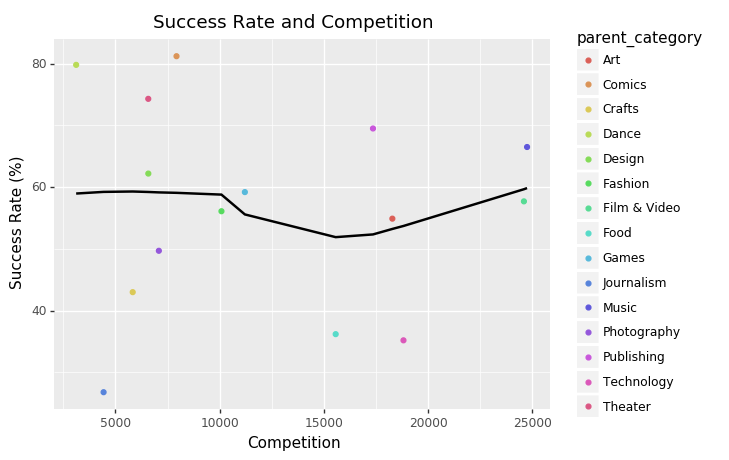

<ggplot: (-9223372029265177077)>

In [53]:
ggplot(competition, aes('Competition', 'Success Rate (%)')) + geom_point(aes(color='parent_category'))\
+ geom_smooth()+ ggtitle("Success Rate and Competition")

The relationship between competition and success rate is not linear, indicating there are other influencing factors affecting the success of a crowdfunding campaign. Regardless, it can be seen that some categories cope very well with competition, such as Music and Publishing, while others stay behind, such as Technology and Food. In general, the highest performing areas also show low competition with the exception of Journalism, which even with relatively low competition still underperforms - this might be due to being an unpopular area.

## 6. The Role of Project Name

Marketing plays a big role in the successfulness of projects. The very first project's information that a potential backer perceives is its name. It is believed that a concise, catchy, but professional name is simply better.

In [54]:
# do not take into account the live projects
data_kick = kickstarter[~kickstarter['state'].isin(['live'])]

### Name length
Plotting the name length against money pleged per state 

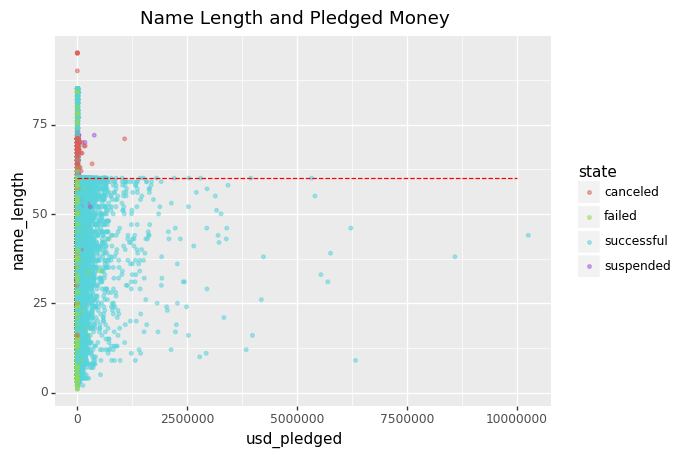

<ggplot: (7595031893)>

In [56]:
# get the lenght of the project's name
data_kick['name_length'] = data_kick['name'].str.len()
p = ggplot(data_kick, aes('usd_pledged', 'name_length')) + geom_point(aes(color='state'),alpha=0.5, size = 1) 
p + annotate("segment", x = 10, xend = 1e7, y = 60, yend = 60, colour = "red", linetype = "dashed")\
+ ggtitle("Name Length and Pledged Money")

One can easily observe that there are very few projects that have pledged over 1M USD and had a name longer than 60 symbols (above red line). Nevertheless, there are few outliers that pledged over 5M USD and make it harder to distinguish them from projects with less money pledged. Therefore, we analyze further just focusing on projects that pleged less than 1M USD and splitting them by category based on the name leght

In [57]:
data_kick = data_kick.dropna(subset=['name_length'])  #drop na's in the namelenght column

data_kick['group'] = pd.cut(data_kick['name_length'],4)

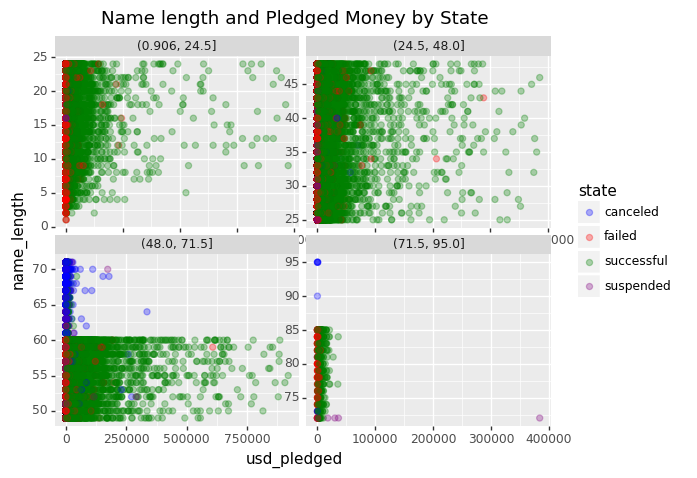

<ggplot: (-9223372029306358619)>

In [58]:
p = ggplot(data_kick[data_kick['usd_pledged']<1e6], aes('usd_pledged', 'name_length')) 
p + geom_point(aes(color='state'), size=2, alpha = 0.3) + facet_wrap('group', scales = "free", labeller=labels) \
+ scale_color_manual(values=("blue", "red", "green","purple")) + ggtitle("Name length and Pledged Money by State")

The above plot demonstrated that there were no successfull projects with the name lenght above 85 (only few that were canceled) and also the high concentration of failed project between 75
and 85. 

### Proper spelling

It is not very obvious wether people prefer a proper spelling over including numbers, using uppercases, or even special characters. Therefore, in this section we will try to figure it out. 
In the below we use the following definitions:
- proper spelling - proper capitalization of words
- upper - uppercases for all leters
- alphabetic - only alphabetic (no numbers)
- exlcaim - name ends with "!"
- question - name ends with "?"

In [59]:
# prepare the data

data_kick['name_is_proper'] = data_kick.name.str.istitle() # proper spelling
data_kick['name_is_upper'] = data_kick.name.str.isupper() # upper cases
data_kick['name_is_alphabetic'] = data_kick.name.str.isalpha() # only alphabetic
data_kick['name_exclaim'] = (data_kick.name.str[-1] == '!') # presence of ! at the end
data_kick['name_question'] = (data_kick.name.str[-1] == '?') # presence of ? at the end

columns = ['Check', 'True', 'Success rate']
df = pd.DataFrame(columns=columns)
todo = data_kick['name'].count()
l = ['name_is_proper', 'name_is_upper', 'name_is_alphabetic', 'name_exclaim', 'name_question']

for check in l:
  si = data_kick[(data_kick[check] == True) & (data_kick['state'] == 'successful')]['name'].count()
  no = data_kick[(data_kick[check] == False) & (data_kick['state'] == 'successful')]['name'].count()
  df = df.append({'Check': check, 'True': 'False', 'Success rate': no/todo*100}, ignore_index=True)
  df = df.append({'Check': check, 'True': 'True', 'Success rate': si/todo*100}, ignore_index=True)

df.head()

Check   True  Success rate
0      name_is_proper  False     35.617522
1      name_is_proper   True     17.811846
2       name_is_upper  False     51.563648
3       name_is_upper   True      1.865720
4  name_is_alphabetic  False     52.074113

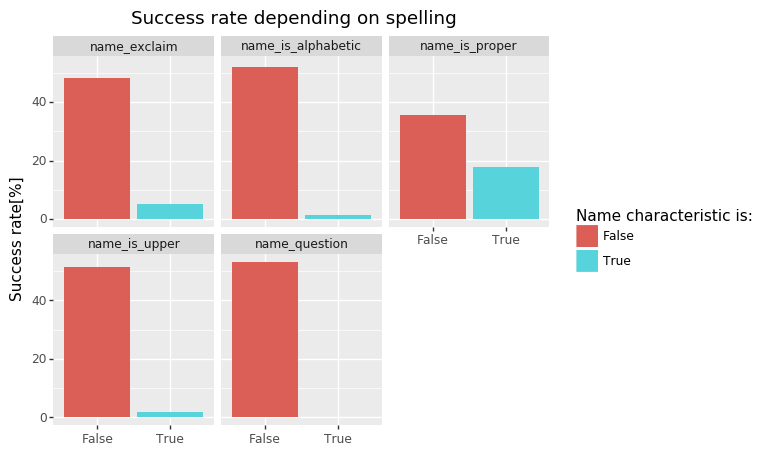

<ggplot: (7547852401)>

In [60]:
# draw the graph
g = ggplot(df, aes('True', 'Success rate', fill='True')) + geom_bar(stat="identity") + facet_wrap('Check') 
g + labs(title="Success rate depending on spelling", x="",  y="Success rate[%]") +labs(fill="Name characteristic is:")

Given the above graps we can clearly see that using a question mark, all upper, only alphabetic, upper cases is not the best idea (success rates close to 0, way below the opposite case). Slightly higher success rates when there is exclamation marks and when proper spelling is not used. This might suggest the need of an eye-catcher in the name of the project.

### Number of words

In this section we will analyze how the number of words in project's name affect money pledged and success rates.

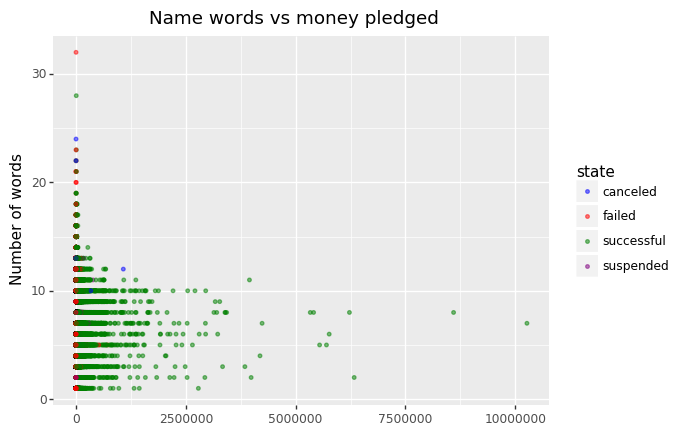

<ggplot: (7571077766)>

In [61]:
# number of words in the name
data_kick['name_words'] = data_kick.name.apply(lambda x: len(str(x).split(' ')))
g= ggplot(data_kick, aes('usd_pledged', 'name_words')) + geom_point(aes(color='state'),alpha=0.5, size = 1) 
g + labs(title="Name words vs money pledged", x="",  y="Number of words") + scale_color_manual(values=("blue", "red", "green","purple"))

It can be seen that there are more pojects that failed with around 20 words but to gain more insights we will analyze further by checking success rate per number of words and also differentiate whether the project was staff picked or not.

In [62]:
# preparing the data
df = pd.pivot_table(data_kick, values='name', index=['name_words', 'staff_pick'],\
                     columns=['state'], aggfunc='count',  fill_value=0)
df["total"] = df.sum(axis=1)
df['success_rate'] = df['successful']/df['total']*100
df = df.reset_index()
staff_mean = df[df['staff_pick'] == True]['success_rate'].mean()
not_staff_mean = df[df['staff_pick'] == False]['success_rate'].mean()

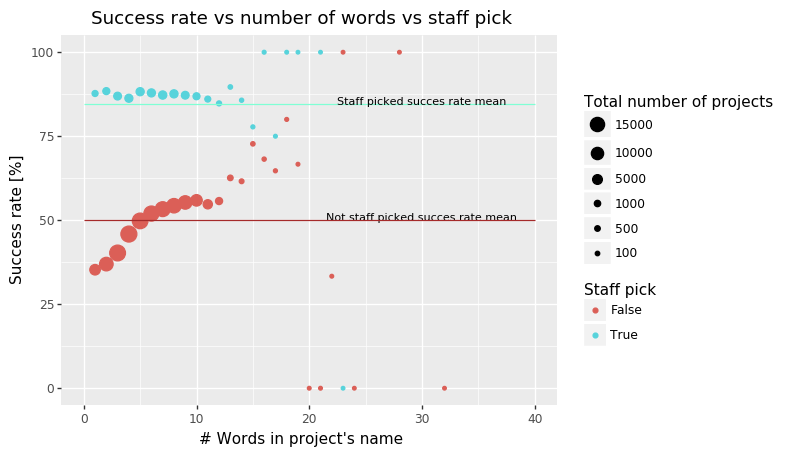

<ggplot: (-9223372029251946871)>

In [63]:
# plotting the grpah
g = ggplot(df, aes('name_words', 'success_rate')) + geom_point((aes(color = 'staff_pick', size='total')))
g + labs(title="Success rate vs number of words vs staff pick",
       x="# Words in project's name", 
       y="Success rate [%]",
       size = "Total number of projects", 
       color='Staff pick') + \
        scale_size_continuous(breaks=(15000, 10000, 5000, 1000, 500, 100)) + \
        annotate("segment", x = 0, xend=40, y = staff_mean, yend = staff_mean, colour = "aquamarine") + \
        annotate("text", x = 30, y = staff_mean+1, label = "Staff picked succes rate mean", size='8') + \
        annotate("text", x = 30, y = not_staff_mean+1, label = "Not staff picked succes rate mean", size='8') + \
        annotate("segment", x = 0, xend=40, y = not_staff_mean, yend = not_staff_mean, colour = "brown")

The above graph depicts success rate depending on number of words in the project name and discremenating whether the project was picked by staff (red color) or not (blue color). Also, the higher the circle the more number of projects were with the corresponing number of words in the project. It can clearly be seen that the projects picked by staff outperfom the others. Also, interestingly staff picked projects have constat success rate above 80% for projects with less than 10 words while the ones not picked by staff increase significantly success rate as the number of words increases until 20 words.

**Implications for creators:** chosing the correct project name clearly makes difference and the following guideline should help with choosing the right name:


1.   Make sure not to write a question mark or exlamation point at the end of your project name
2.   Use proper spelling but do not forget to use tricks that would catch attention of readers
3.   Unless you are really confident about your name, do not use more than 10 words. 
4.   If your goal is to be picked by staff, aim for 5 words in the name

**Implications for kickstarter** Create a detector of weak names while users type their project name and give direct feedback. It should give warnings when for example, question mark or exlamation is used, name is longer than 15 words or/and 80 characters, and etc.



## Conclusions

**The Role of Timing:**

* The decreasing amount of money pledged per year is worrying for Kickstarter
* The increasing success rate due to lower goals and less competition is a positive development for creators
* Projects should be launched in the spring months while July and December should be avoided
* Projects should be launched in the afternoon

**The Role of Location:**

* The country in which a project is launched affects its success rate
* Kickstarter can improve platform experience by guiding potential creators to the most successful category in their country
* Kickstarter should further personalize marketing campaigns of the most successful categories in each country to attract more crowdfunding campaigns

**The Role of Creators:**

* Experience increases the chance of success
* The success rate of a second project is almost 70%, Kickstarter should incentivise existing creators
* Creators should specialize in a single category to increase the chance of success
* Kickstarter should advertise the "Follow" button on creators' profiles to boost community effect by for example suggestion pop-ups 

**The Role of Backers:**

* Popular categories amongst the backers are Games, Technology and Film & Video
* Unpopular categories are Journalism, Dance and Craft
* Kickstarter should promote the less popular categories to improve pledged amounts, as the latter increases with the number of backers

**The Role of Project Name:**

* Choosing a concise, catchy, but professional name for project is the first building block for the project’s success
* Kickstarter should implement a project name strength algorithm (meter) to give real-time feedback to creators

![alt text](https://thenostalgistfilm.files.wordpress.com/2013/08/madewithover.jpg)